
**Model:** K-Nearest Neighbor (KNN)
***

# Step 1 - Import Libraries and Dataset

### 1. Import libraries.

In [2698]:
import numpy as np
import pandas as pd

### 2. Access file.

In [2699]:
cd C:\Users\User

C:\Users\User


### 3. Reading cvs file.

In [2700]:
heartDisease = pd.read_csv('heart_disease.csv')
heartDisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Step 2 - Data Analysis

### 1. Display first 8 rows of the dataset.

In [2701]:
heartDisease.head(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


### 2. Display the information of the dataset.

In [2702]:
heartDisease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 3. List all the columns of the dataset.

In [2703]:
# Show with applying dataframe for better visualization
df1 = pd.DataFrame(heartDisease.columns)
df1.columns = ['features']
df1

,features
0,age
1,sex
2,cp
3,trestbps
4,chol
5,fbs
6,restecg
7,thalach
8,exang
9,oldpeak


### 4. List al the values of 'target'.

In [2704]:
heartDisease['target'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Step 3 - Data processing

### 1. Checking is there any null values.

In [2705]:
heartDisease.apply(lambda x: sum (x.isnull()), axis = 0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 2. Remove duplicates from dataset.

In [2706]:
heartDisease = heartDisease.drop_duplicates()

### 3. Display the dataset again after data processing.

In [2707]:
heartDisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Step 4 - Split data

### 1. Allocate feature and target column.

In [2708]:
feature = heartDisease.iloc[:, 0:13]
target = heartDisease.iloc[:, -1]

### 2. Show the shape of feature and target.

In [2709]:
print("After allocating feature and target columns ... ")
print("Shape of feature: ", feature.shape)
print("Shape of target: ", target.shape)

After allocating feature and target columns ... 
Shape of feature:  (302, 13)
Shape of target:  (302,)


### 3. Check all the feature columns.

In [2710]:
feature

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


### 4. Check the target column.

In [2711]:
# Show with applying dataframe for better visualization
pd.DataFrame (target)

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


### 5. Import library.

In [2712]:
from sklearn.model_selection import train_test_split

## 1st Train Dataset: Ratio (80:20)

### 1. Split the data into 80:20 ratio.

In [2713]:
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(feature, target, test_size = 0.2, random_state = 42)

print("Shape of X1_train: ", X1_train.shape)
print("Shape of X1_test: ", X1_test.shape)
print("\n")
print("Shape of y1_train: ", y1_train.shape)
print("Shape of y1_test: ", y1_test.shape)

Shape of X1_train:  (241, 13)
Shape of X1_test:  (61, 13)


Shape of y1_train:  (241,)
Shape of y1_test:  (61,)


### 2. Show the first 5 rows of X1_train set.

In [2714]:
X1_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2


### 3. Show the first 5 rows of X1_test set.

In [2715]:
X1_test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


## 2nd Train Dataset: Ratio (70:30)

### 1. Split the data into 70:30 ratio.

In [2716]:
# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(feature, target, test_size = 0.3, random_state = 42)

print("Shape of X2_train: ", X2_train.shape)
print("Shape of X2_test: ", X2_test.shape)
print("\n")
print("Shape of y2_train: ", y2_train.shape)
print("Shape of y2_test: ", y2_test.shape)

Shape of X2_train:  (211, 13)
Shape of X2_test:  (91, 13)


Shape of y2_train:  (211,)
Shape of y2_test:  (91,)


### 2. Show the first 5 rows of X2_train set.

In [2717]:
X2_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2


### 3. Show the first 5 rows of X2_test set.

In [2718]:
X2_test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


## 3rd Train Dataset: Ratio (60:40)

### 1. Split the data into 60:40 ratio.

In [2719]:
# Split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(feature, target, test_size = 0.4, random_state = 42)

print("Shape of X3_train: ", X3_train.shape)
print("Shape of X3_test: ", X3_test.shape)
print("\n")
print("Shape of y3_train: ", y3_train.shape)
print("Shape of y3_test: ", y3_test.shape)

Shape of X3_train:  (181, 13)
Shape of X3_test:  (121, 13)


Shape of y3_train:  (181,)
Shape of y3_test:  (121,)


### 2. Show the first 5 rows of X3_train set.

In [2720]:
X3_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3


### 3. Show the first 5 rows of X3_test set.

In [2721]:
X3_test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


# Step 5 - Train Model with Different Ratios (Without Feature Selection and Parameter Tuning)

**Objective:** To choose the **most suitable ratios** and **use that ratio only** for testing different cases.

### 1. Import model of K-Nearest Neighbor (KNN).

In [2722]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt

## Ratio (80:20)

### 1. Scale the features.

In [2723]:
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

### 2. Running from K = 1 through 65 and record testing accuracy.

In [2724]:
k_range = range(1,66)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X1_train_scaled, y1_train)
        knn_pred1 = knn.predict(X1_test_scaled)
        scores[k] = metrics.accuracy_score(y1_test, knn_pred1)
        scores_list.append(metrics.accuracy_score(y1_test, knn_pred1))

### 3. Testing accuracy for each value of K and show the highest

In [2725]:
# Find the key with the largest value
largest_k = max(scores, key = scores.get)

# Retrieve the largest value
largest_scores = scores[largest_k]

# Print the largest key-value pair
print("Largest value of K: ", largest_k)
print("Scores: ", largest_scores)

Largest value of K:  5
Scores:  0.9180327868852459


### 4. Plot the relationship between K and the testing accuracy.

Text(0, 0.5, 'Testing Accuracy')

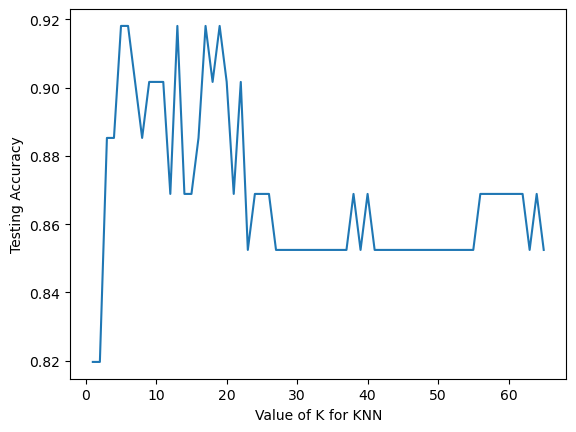

In [2726]:
plt.plot(k_range, scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

### 5. Train the data with largest value of K.

In [2727]:
knn1 = KNeighborsClassifier(n_neighbors = largest_k)
knn1.fit(X1_train_scaled, y1_train)

KNeighborsClassifier()

### 6. Make prediction with test dataset.

In [2728]:
knn_pred1 = knn1.predict(X1_test_scaled)
knn_pred1

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

## Ratio (70:30)

### 1. Scale the features.

In [2729]:
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

### 2. Running from K = 1 through 65 and record testing accuracy.

In [2730]:
k_range = range(1,66)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X2_train_scaled, y2_train)
        knn_pred2 = knn.predict(X2_test_scaled)
        scores[k] = metrics.accuracy_score(y2_test, knn_pred2)
        scores_list.append(metrics.accuracy_score(y2_test, knn_pred2))

### 3. Testing accuracy for each value of K and show the highest

In [2731]:
# Find the key with the largest value
largest_k = max(scores, key = scores.get)

# Retrieve the largest value
largest_scores = scores[largest_k]

# Print the largest key-value pair
print("Largest value of K: ", largest_k)
print("Scores: ", largest_scores)

Largest value of K:  5
Scores:  0.8571428571428571


### 4. Plot the relationship between K and the testing accuracy.

Text(0, 0.5, 'Testing Accuracy')

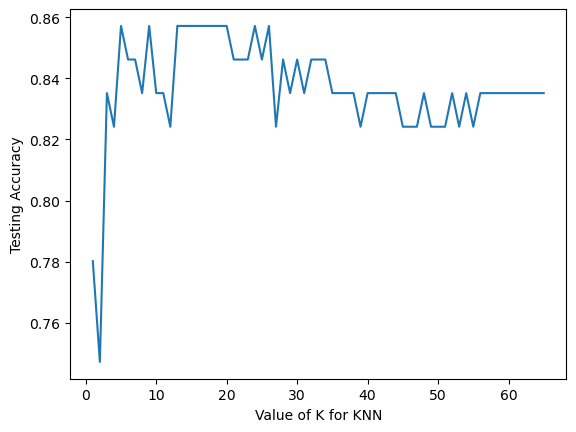

In [2732]:
plt.plot(k_range, scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

### 5. Train the data with largest value of K.

In [2733]:
knn2 = KNeighborsClassifier(n_neighbors = largest_k)
knn2.fit(X2_train_scaled, y2_train)

KNeighborsClassifier()

### 6. Make prediction with test dataset.

In [2734]:
knn_pred2 = knn2.predict(X2_test_scaled)
knn_pred2

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1], dtype=int64)

## Ratio (60:40)

### 1. Scale the features.

In [2735]:
scaler = StandardScaler()
X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

### 2. Running from K = 1 through 65 and record testing accuracy.

In [2736]:
k_range = range(1,66)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X3_train_scaled, y3_train)
        knn_pred3 = knn.predict(X3_test_scaled)
        scores[k] = metrics.accuracy_score(y3_test, knn_pred3)
        scores_list.append(metrics.accuracy_score(y3_test, knn_pred3))

### 3. Testing accuracy for each value of K and show the highest

In [2737]:
# Find the key with the largest value
largest_k = max(scores, key = scores.get)

# Retrieve the largest value
largest_scores = scores[largest_k]

# Print the largest key-value pair
print("Largest value of K: ", largest_k)
print("Scores: ", largest_scores)

Largest value of K:  13
Scores:  0.859504132231405


### 4. Plot the relationship between K and the testing accuracy.

Text(0, 0.5, 'Testing Accuracy')

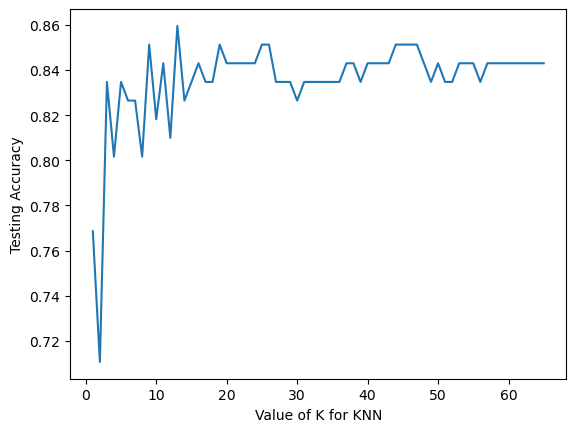

In [2738]:
plt.plot(k_range, scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

### 5. Train the data with largest value of K.

In [2739]:
knn3 = KNeighborsClassifier(n_neighbors = largest_k)
knn3.fit(X3_train_scaled, y3_train)

KNeighborsClassifier(n_neighbors=13)

### 6. Make prediction with test dataset.

In [2740]:
knn_pred1 = knn3.predict(X1_test_scaled)
knn_pred1

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

# Step 6 - Overfitting Test

### 1. Import library.

In [2741]:
from sklearn.metrics import mean_squared_error

## Ratio (80:20)

### 1. Make prediction with train dataset.

In [2742]:
knn_pred_overfit1 = knn1.predict(X1_train_scaled)
knn_pred_overfit1

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
      dtype=int64)

### 2. Evaluate performance on the train dataset.

In [2743]:
train_mse1 = mean_squared_error(y1_train, knn_pred_overfit1)
print("Training Mean Squared Error: ", train_mse1)

Training Mean Squared Error:  0.13692946058091288


### 3. Evaluate performance on the test dataset.

In [2744]:
test_mse1 = mean_squared_error(y1_test, knn_pred1)
print("Test Mean Squared Error: ", test_mse1)

Test Mean Squared Error:  0.13114754098360656


### 4. Analyze the results.

In [2745]:
print("1st Train Dataset - Overfitting Test")
print("=" * 36)
if train_mse1 < test_mse1:
    print("The model is not overfitting.")
else:
    print("The model may be overfitting.")

1st Train Dataset - Overfitting Test
The model may be overfitting.


## Ratio (70:30)

### 1. Make prediction with train dataset.

In [2746]:
knn_pred_overfit2 = knn2.predict(X2_train_scaled)
knn_pred_overfit2

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

### 2. Evaluate performance on the train dataset.

In [2747]:
train_mse2 = mean_squared_error(y2_train, knn_pred_overfit2)
print("Training Mean Squared Error: ", train_mse2)

Training Mean Squared Error:  0.11374407582938388


### 3. Evaluate performance on the test dataset.

In [2748]:
test_mse2 = mean_squared_error(y2_test, knn_pred2)
print("Test Mean Squared Error: ", test_mse2)

Test Mean Squared Error:  0.14285714285714285


### 4. Analyze the results.

In [2749]:
print("2nd Train Dataset - Overfitting Test")
print("=" * 36)
if train_mse2 < test_mse2:
    print("The model is not overfitting.")
else:
    print("The model may be overfitting.")

2nd Train Dataset - Overfitting Test
The model is not overfitting.


## Ratio (60:40)

### 1. Make prediction with train dataset.

In [2750]:
knn_pred_overfit3 = knn3.predict(X3_train_scaled)
knn_pred_overfit3

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1], dtype=int64)

### 2. Evaluate performance on the train dataset.

In [2751]:
train_mse3 = mean_squared_error(y3_train, knn_pred_overfit3)
print("Training Mean Squared Error: ", train_mse3)

Training Mean Squared Error:  0.16574585635359115


### 3. Evaluate performance on the test dataset.

In [2752]:
test_mse3 = mean_squared_error(y3_test, knn_pred3)
print("Test Mean Squared Error: ", test_mse3)

Test Mean Squared Error:  0.15702479338842976


### 4. Analyze the results.

In [2753]:
print("3rd Train Dataset - Overfitting Test")
print("=" * 36)
if train_mse3 < test_mse3:
    print("The model is not overfitting.")
else:
    print("The model may be overfitting.")

3rd Train Dataset - Overfitting Test
The model may be overfitting.


## Conclusion

After completing overfitting test by using three different ratio of dataset, and also compare between train dataset with test dataset, we found that **the model (KNN) may be overfitting** with ratios **80:20** and **60:40**, but **is not overfitting** with ratio **70:30**.

# Step 7 - Model Evaluation (Without Feature Selection and Parameter Tuning)

### 1. Import libraries.

In [2754]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Ratio (80:20)

### 1. Show the evaluation result of 1st train dataset (80:20).

In [2755]:
print('1st Train Dataset (80:20) - K-Nearest Neighbor Results')
print("=" * 55)
print('Accuracy:', round(accuracy_score(y1_test, knn_pred1), 6))
print('Precision:', round(precision_score(y1_test, knn_pred1), 6))
print('Recall:', round(recall_score(y1_test, knn_pred1), 6))
print('F1 score:', round(f1_score(y1_test, knn_pred1), 6))
print('Confusion matrix:')
print(confusion_matrix(y1_test, knn_pred1))

1st Train Dataset (80:20) - K-Nearest Neighbor Results
Accuracy: 0.868852
Precision: 0.928571
Recall: 0.8125
F1 score: 0.866667
Confusion matrix:
[[27  2]
 [ 6 26]]


## Ratio (70:30)

### 1. Show the evaluation result of 2nd train dataset (70:30).

In [2756]:
print('2nd Train Dataset (70:30) - K-Nearest Neighbor Results')
print("=" * 55)
print('Accuracy:', round(accuracy_score(y2_test, knn_pred2), 6))
print('Precision:', round(precision_score(y2_test, knn_pred2), 6))
print('Recall:', round(recall_score(y2_test, knn_pred2), 6))
print('F1 score:', round(f1_score(y2_test, knn_pred2), 6))
print('Confusion matrix:')
print(confusion_matrix(y2_test, knn_pred2))

2nd Train Dataset (70:30) - K-Nearest Neighbor Results
Accuracy: 0.857143
Precision: 0.86
Recall: 0.877551
F1 score: 0.868687
Confusion matrix:
[[35  7]
 [ 6 43]]


## Ratio (60:40)

### 1. Show the evaluation result of 3rd train dataset (60:40).

In [2757]:
print('3rd Train Dataset (60:40) - K-Nearest Neighbor Results')
print("=" * 55)
print('Accuracy:', round(accuracy_score(y3_test, knn_pred3), 6))
print('Precision:', round(precision_score(y3_test, knn_pred3), 6))
print('Recall:', round(recall_score(y3_test, knn_pred3), 6))
print('F1 score:', round(f1_score(y3_test, knn_pred3), 6))
print('Confusion matrix:')
print(confusion_matrix(y3_test, knn_pred3))

3rd Train Dataset (60:40) - K-Nearest Neighbor Results
Accuracy: 0.842975
Precision: 0.828947
Recall: 0.913043
F1 score: 0.868966
Confusion matrix:
[[39 13]
 [ 6 63]]


## Choose the most suitable ratio
After completing the evaluation process, we decide to choose **80:20 ratio** to test different cases.

In [2758]:
X_train = X1_train
X_test = X1_test
y_train = y1_train
y_test = y1_test

### 1. Scale the features.

In [2759]:
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train)
X_test_scaled1 = scaler.transform(X_test)

# Step 8 - Feature selection

## Method A: Correlation matrix wit heatmap

### 1. Import libraries.

In [2760]:
import matplotlib.pyplot as plt
import seaborn as sns

### 2. The configuration of the correlation matrix with heatmap.

In [2761]:
corrmat = df.corr()
top_corr_features = corrmat.index

### 3. Show the heatmap.

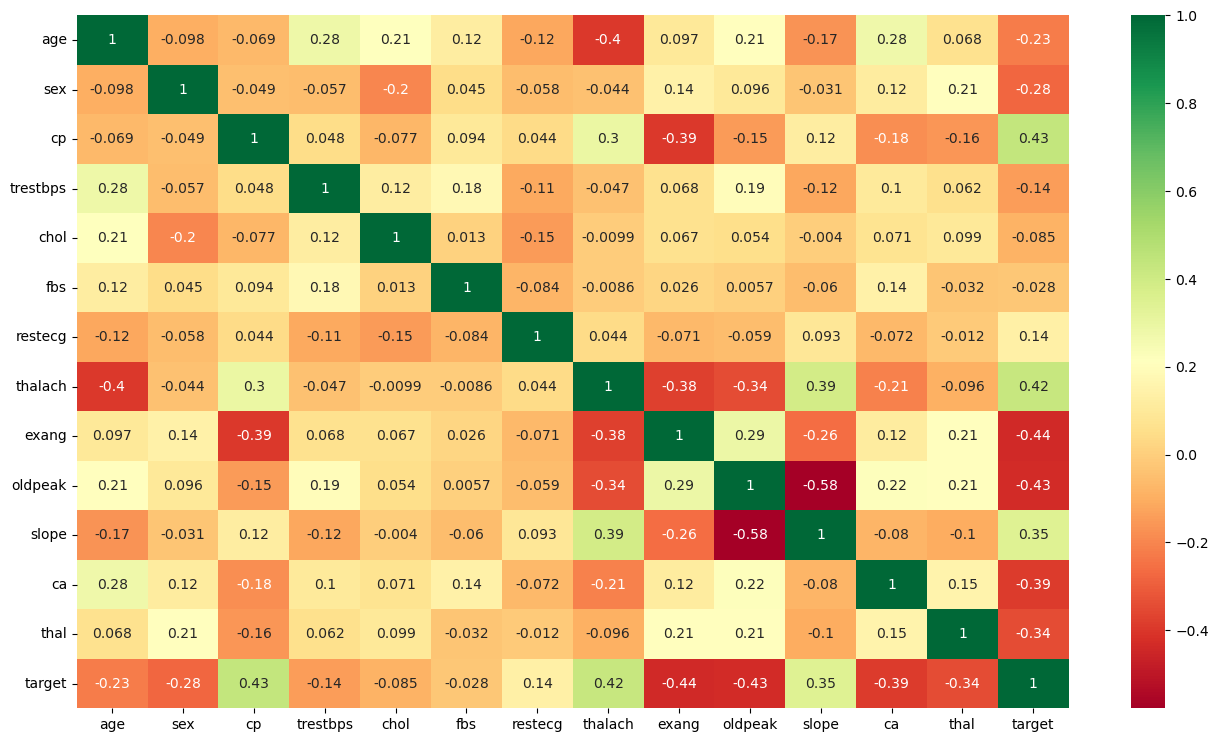

In [2762]:
plt.figure(figsize = (16, 9))
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")
plt.show()

## Method B: Univariate selection

### 1. Import libraries.

In [2763]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### 2. Apply selectKBest class to extract top 13 best features.

In [2764]:
bestfeatures = SelectKBest(score_func = chi2, k = 13)
fit = bestfeatures.fit(feature, target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(feature.columns)

In [2765]:
print("Show dfscores: ")
dfscores

Show dfscores: 


,0
0,22.210517
1,7.721690
2,62.116086
3,15.094591
4,21.690747
5,0.184946
6,2.877743
7,186.180286
8,38.518849
9,71.692782


In [2766]:
print("Show dfcolumns: ")
dfcolumns

Show dfcolumns: 


,0
0,age
1,sex
2,cp
3,trestbps
4,chol
5,fbs
6,restecg
7,thalach
8,exang
9,oldpeak


### 3. Concat two data frames and show it for better visualization.

In [2767]:
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['features','score']
featureScores

,features,score
0,age,22.210517
1,sex,7.721690
2,cp,62.116086
3,trestbps,15.094591
4,chol,21.690747
5,fbs,0.184946
6,restecg,2.877743
7,thalach,186.180286
8,exang,38.518849
9,oldpeak,71.692782


### 4. Show 13 best features for the dataset by ordering the score.

In [2768]:
pd.DataFrame(featureScores.nlargest(13,'score'))

,features,score
7,thalach,186.180286
9,oldpeak,71.692782
11,ca,71.020719
2,cp,62.116086
8,exang,38.518849
0,age,22.210517
4,chol,21.690747
3,trestbps,15.094591
10,slope,9.677715
1,sex,7.721690


### 5. Put all the most relatable features in a list:

In [2769]:
# 4 best features with "Correlation Matrix with Heatmap"
best_CMWH_feature1 = ['cp', 'thalach', 'slope', 'restecg']
# 6 best features with "Correlation Matrix with Heatmap"
best_CMWH_feature2 = ['cp', 'thalach', 'slope', 'restecg', 'fbs', 'chol']
# 8 best features "Correlation Matrix with Heatmap"
best_CMWH_feature3 = ['cp', 'thalach', 'slope', 'restecg', 'fbs', 'chol', 'trestbps', 'age']

# 4 best features with "Univariate Selection"
best_US_feature1 = ['thalach', 'oldpeak', 'ca', 'cp']
# 6 best features with "Univariate Selection"
best_US_feature2 = ['thalach', 'oldpeak', 'ca', 'cp', 'exang', 'age']
# 8 best features with "Univariate Selection"
best_US_feature3 = ['thalach', 'oldpeak', 'ca', 'cp', 'exang', 'age', 'chol', 'trestbps']

# Step 9 - Parameter Tuning

### 1. Import libraries.

In [2770]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

### 2. Define the hyperparameters.

In [2771]:
param_grid = {
    'n_neighbors': [20, 40, 60],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]
}

### 3. Find the best hyperparameters.

In [2772]:
knn_grid_search = GridSearchCV(knn1, param_grid, cv = 5, verbose = 1, n_jobs = -1, scoring = "accuracy")

# Use the selected ratio - 80:20 to find the best parameters
knn_grid_search.fit(X_train_scaled1, y_train)

print("\nParameter tuning is completed.\n\nBest hyperparameters: ", knn_grid_search.best_params_)
print("Best score: ", knn_grid_search.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits

Parameter tuning is completed.

Best hyperparameters:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 60, 'p': 1, 'weights': 'uniform'}
Best score:  0.8340986394557823


### 4. Create an instance of the model to hold the trained KNN model with the best hyperparameters.

In [2773]:
best_knn = knn_grid_search.best_estimator_

# Step 10 -  Train Model (With Different Cases)

## Case 1 Information:
**Method of Feature selection:** Correlation Matrix with Heatmap

**With parameter tuning ?:** NO

**Number of features:** 4

**Ratio:** 80:20

### 1. Scale the features with feature selection.

In [2774]:
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train[best_CMWH_feature1])
X_test_scaled2 = scaler.transform(X_test[best_CMWH_feature1])

### 2. Train the data with Case 1.

In [2775]:
knn1.fit(X_train_scaled2, y_train)

KNeighborsClassifier()

### 3. Make prediction with test data set.

In [2776]:
knn_pred4 = knn1.predict(X_test_scaled2)
knn_pred4

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

## Case 2 Information:
**Method of Feature selection:** Correlation Matrix with Heatmap

**With parameter tuning ?:** YES

**Number of features:** 4

**Ratio:** 80:20

### 1. Scale the features with feature selection.

In [2777]:
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train[best_CMWH_feature1])
X_test_scaled3 = scaler.transform(X_test[best_CMWH_feature1])

### 2.Train the data with Case 2.

In [2778]:
best_knn.fit(X_train_scaled3, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=60, p=1)

### 3. Make prediction with test data set.

In [2779]:
knn_pred5 = best_knn.predict(X_test_scaled3)
knn_pred5

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

## Case 3 Information:
**Method of Feature selection:** Correlation Matrix with Heatmap

**With parameter tuning ?:** NO

**Number of features:** 6

**Ratio:** 80:20

### 1. Scale the features with feature selection.

In [2780]:
scaler = StandardScaler()
X_train_scaled4 = scaler.fit_transform(X_train[best_CMWH_feature2])
X_test_scaled4 = scaler.transform(X_test[best_CMWH_feature2])

### 2.Train the data with Case 3.

In [2781]:
knn1.fit(X_train_scaled4, y_train)

KNeighborsClassifier()

### 3.Make prediction with test data set.

In [2782]:
knn_pred6 = knn1.predict(X_test_scaled4)
knn_pred6

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

## Case 4 Information:
**Method of Feature selection:** Correlation Matrix with Heatmap

**With parameter tuning ?:** YES

**Number of features:** 6

**Ratio:** 80:20

### 1. Scale the features with feature selection.

In [2783]:
scaler = StandardScaler()
X_train_scaled5 = scaler.fit_transform(X_train[best_CMWH_feature2])
X_test_scaled5 = scaler.transform(X_test[best_CMWH_feature2])

### 2. Train the data with Case 4.

In [2784]:
best_knn.fit(X_train_scaled5, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=60, p=1)

### 3. Make prediction with test data set.

In [2785]:
knn_pred7 = best_knn.predict(X_test_scaled5)
knn_pred7

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

## Case 5 Information:
**Method of Feature selection:** Correlation Matrix with Heatmap

**With parameter tuning ?:** NO

**Number of features:** 8

**Ratio:** 80:20

### 1. Scale the features with feature selection.

In [2786]:
scaler = StandardScaler()
X_train_scaled6 = scaler.fit_transform(X_train[best_CMWH_feature3])
X_test_scaled6 = scaler.transform(X_test[best_CMWH_feature3])

### 2. Train the data with Case 5.

In [2787]:
knn1.fit(X_train_scaled6, y_train)

KNeighborsClassifier()

### 3. Make prediction with test data set.

In [2788]:
knn_pred8 = knn1.predict(X_test_scaled6)
knn_pred8

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

## Case 6 Information:
**Method of Feature selection:** Correlation Matrix with Heatmap

**With parameter tuning ?:** YES

**Number of features:** 8

**Ratio:** 80:20

### 1. Scale the features with feature selection.

In [2789]:
scaler = StandardScaler()
X_train_scaled7 = scaler.fit_transform(X_train[best_CMWH_feature3])
X_test_scaled7 = scaler.transform(X_test[best_CMWH_feature3])

### 2. Train the data with Case 6.

In [2790]:
best_knn.fit(X_train_scaled7, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=60, p=1)

### 3. Make prediction with test data set.

In [2791]:
knn_pred9 = best_knn.predict(X_test_scaled7)
knn_pred9

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

## Case 7 Information:
**Method of Feature selection:** Univariate Selection

**With parameter tuning ?:** NO

**Number of features:** 4

**Ratio:** 80:20

### 1. Scale the features with feature selection.

In [2792]:
scaler = StandardScaler()
X_train_scaled8 = scaler.fit_transform(X_train[best_US_feature1])
X_test_scaled8 = scaler.transform(X_test[best_US_feature1])

### 2. Train data with Case 7.

In [2793]:
knn1.fit(X_train_scaled8, y_train)

KNeighborsClassifier()

### 3. Make prediction with test data set.

In [2794]:
knn_pred10 = knn1.predict(X_test_scaled8)
knn_pred10

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

## Case 8 Information:
**Method of Feature selection:** Univariate Selection

**With parameter tuning ?:** YES

**Number of features:** 4

**Ratio:** 80:20

### 1. Scale the features with feature selection.

In [2795]:
scaler = StandardScaler()
X_train_scaled9 = scaler.fit_transform(X_train[best_US_feature1])
X_test_scaled9 = scaler.transform(X_test[best_US_feature1])

### 2. Train data with Case 8.

In [2796]:
best_knn.fit(X_train_scaled9, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=60, p=1)

### 3. Make prediction with test data set.

In [2797]:
knn_pred11 = best_knn.predict(X_test_scaled9)
knn_pred11

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

## Case 9 Information:
**Method of Feature selection:** Univariate Selection

**With parameter tuning ?:** NO

**Number of features:** 6

**Ratio:** 80:20

### 1. Scale the features with feature selection.

In [2798]:
scaler = StandardScaler()
X_train_scaled10 = scaler.fit_transform(X_train[best_US_feature2])
X_test_scaled10 = scaler.transform(X_test[best_US_feature2])

### 2. Train data with Case 9.

In [2799]:
knn1.fit(X_train_scaled10, y_train)

KNeighborsClassifier()

### 3. Make prediction with test data set.

In [2800]:
knn_pred12 = knn1.predict(X_test_scaled10)
knn_pred12

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

## Case 10 Information:
**Method of Feature selection:** Univariate Selection

**With parameter tuning ?:** YES

**Number of features:** 6

**Ratio:** 80:20

### 1. Scale the features with feature selection.

In [2801]:
scaler = StandardScaler()
X_train_scaled11 = scaler.fit_transform(X_train[best_US_feature2])
X_test_scaled11 = scaler.transform(X_test[best_US_feature2])

### 2. Train data with Case 10.

In [2802]:
best_knn.fit(X_train_scaled11, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=60, p=1)

### 3. Make prediction with test data set.

In [2803]:
knn_pred13 = best_knn.predict(X_test_scaled11)
knn_pred13

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

## Case 11 Information:
**Method of Feature selection:** Univariate Selection

**With parameter tuning ?:** NO

**Number of features:** 8

**Ratio:** 80:20

### 1. Scale the features with feature selection.

In [2804]:
scaler = StandardScaler()
X_train_scaled12 = scaler.fit_transform(X_train[best_US_feature3])
X_test_scaled12 = scaler.transform(X_test[best_US_feature3])

### 2. Train data with Case 11.

In [2805]:
knn1.fit(X_train_scaled12, y_train)

KNeighborsClassifier()

### 3. Make prediction with test data set.

In [2806]:
knn_pred14 = knn1.predict(X_test_scaled12)
knn_pred14

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

## Case 12 Information:
**Method of Feature selection:** Univariate Selection

**With parameter tuning ?:** YES

**Number of features:** 8

**Ratio:** 80:20

### 1. Scale the features with feature selection.

In [2807]:
scaler = StandardScaler()
X_train_scaled13 = scaler.fit_transform(X_train[best_US_feature3])
X_test_scaled13 = scaler.transform(X_test[best_US_feature3])

### 1.Train data with Case 12.

In [2808]:
best_knn.fit(X_train_scaled13, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=60, p=1)

### 2. Make prediction with test data set.

In [2809]:
knn_pred15 = best_knn.predict(X_test_scaled13)
knn_pred15

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

# Step 11 - Model Evaluation (With Different Cases)

### 1. Import library.

In [2810]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Case 1 Information:
**Method of Feature selection:** Correlation Matrix with Heatmap

**With parameter tuning ?:** NO

**Number of features:** 4

**Ratio:** 80:20

### 1. Show the evaluation results of Case 1.

In [2811]:
print("Case 1 - K-Nearest Neighbor Evaluation Results")
print("=" * 46)
print("Accuracy: ", round(accuracy_score(y_test, knn_pred4), 6))
print("Precision: ", round(precision_score(y_test, knn_pred4), 6))
print("Recall: ", round(recall_score(y_test, knn_pred4), 6))
print("F1 Score: ", round(f1_score(y_test, knn_pred4), 6))
knn_cfMatrix1 = confusion_matrix(y_test, knn_pred4)
print("Confusion matrix: ")
print(knn_cfMatrix1)

Case 1 - K-Nearest Neighbor Evaluation Results
Accuracy:  0.786885
Precision:  0.806452
Recall:  0.78125
F1 Score:  0.793651
Confusion matrix: 
[[23  6]
 [ 7 25]]


## Case 2 Information:
**Method of Feature selection:** Correlation Matrix with Heatmap

**With parameter tuning ?:** YES

**Number of features:** 4

**Ratio:** 80:20

### 1. Show the evaluation results of Case 2.

In [2812]:
print("Case 2 - K-Nearest Neighbor Evaluation Results")
print("=" * 46)
print("Accuracy: ", round(accuracy_score(y_test, knn_pred5), 6))
print("Precision: ", round(precision_score(y_test, knn_pred5), 6))
print("Recall: ", round(recall_score(y_test, knn_pred5), 6))
print("F1 Score: ", round(f1_score(y_test, knn_pred5), 6))
knn_cfMatrix2 = confusion_matrix(y_test, knn_pred5)
print("Confusion matrix: ")
print(knn_cfMatrix2)

Case 2 - K-Nearest Neighbor Evaluation Results
Accuracy:  0.803279
Precision:  0.794118
Recall:  0.84375
F1 Score:  0.818182
Confusion matrix: 
[[22  7]
 [ 5 27]]


## Case 3 Information:
**Method of Feature selection:** Correlation Matrix with Heatmap

**With parameter tuning ?:** NO

**Number of features:** 6

**Ratio:** 80:20

### 1. Show the evaluation results of Case 3.

In [2813]:
print("Case 3 - K-Nearest Neighbor Evaluation Results")
print("=" * 46)
print("Accuracy: ", round(accuracy_score(y_test, knn_pred6), 6))
print("Precision: ", round(precision_score(y_test, knn_pred6), 6))
print("Recall: ", round(recall_score(y_test, knn_pred6), 6))
print("F1 Score: ", round(f1_score(y_test, knn_pred6), 6))
knn_cfMatrix3 = confusion_matrix(y_test, knn_pred6)
print("Confusion matrix: ")
print(knn_cfMatrix3)

Case 3 - K-Nearest Neighbor Evaluation Results
Accuracy:  0.819672
Precision:  0.888889
Recall:  0.75
F1 Score:  0.813559
Confusion matrix: 
[[26  3]
 [ 8 24]]


## Case 4 Information:
**Method of Feature selection:** Correlation Matrix with Heatmap

**With parameter tuning ?:** YES

**Number of features:** 6

**Ratio:** 80:20

### 1. Show the evaluation results of Case 4.

In [2814]:
print("Case 4 - K-Nearest Neighbor Evaluation Results")
print("=" * 46)
print("Accuracy: ", round(accuracy_score(y_test, knn_pred7), 6))
print("Precision: ", round(precision_score(y_test, knn_pred7), 6))
print("Recall: ", round(recall_score(y_test, knn_pred7), 6))
print("F1 Score: ", round(f1_score(y_test, knn_pred7), 6))
knn_cfMatrix4 = confusion_matrix(y_test, knn_pred7)
print("Confusion matrix: ")
print(knn_cfMatrix4)

Case 4 - K-Nearest Neighbor Evaluation Results
Accuracy:  0.786885
Precision:  0.787879
Recall:  0.8125
F1 Score:  0.8
Confusion matrix: 
[[22  7]
 [ 6 26]]


## Case 5 Information:
**Method of Feature selection:** Correlation Matrix with Heatmap

**With parameter tuning ?:** NO

**Number of features:** 8

**Ratio:** 80:20

### 1. Show the evaluation results of Case 5.

In [2815]:
print("Case 5 - K-Nearest Neighbor Evaluation Results")
print("=" * 46)
print("Accuracy: ", round(accuracy_score(y_test, knn_pred8), 6))
print("Precision: ", round(precision_score(y_test, knn_pred8), 6))
print("Recall: ", round(recall_score(y_test, knn_pred8), 6))
print("F1 Score: ", round(f1_score(y_test, knn_pred8), 6))
knn_cfMatrix5 = confusion_matrix(y_test, knn_pred8)
print("Confusion matrix: ")
print(knn_cfMatrix5)

Case 5 - K-Nearest Neighbor Evaluation Results
Accuracy:  0.754098
Precision:  0.793103
Recall:  0.71875
F1 Score:  0.754098
Confusion matrix: 
[[23  6]
 [ 9 23]]


## Case 6 Information:
**Method of Feature selection:** Correlation Matrix with Heatmap

**With parameter tuning ?:** YES

**Number of features:** 8

**Ratio:** 80:20

### 1. Show the evaluation results of Case 6.

In [2816]:
print("Case 6 - K-Nearest Neighbor Evaluation Results")
print("=" * 46)
print("Accuracy: ", round(accuracy_score(y_test, knn_pred9), 6))
print("Precision: ", round(precision_score(y_test, knn_pred9), 6))
print("Recall: ", round(recall_score(y_test, knn_pred9), 6))
print("F1 Score: ", round(f1_score(y_test, knn_pred9), 6))
knn_cfMatrix6 = confusion_matrix(y_test, knn_pred9)
print("Confusion matrix: ")
print(knn_cfMatrix6)

Case 6 - K-Nearest Neighbor Evaluation Results
Accuracy:  0.803279
Precision:  0.833333
Recall:  0.78125
F1 Score:  0.806452
Confusion matrix: 
[[24  5]
 [ 7 25]]


## Case 7 Information:
**Method of Feature selection:** Univariate Selection

**With parameter tuning ?:** NO

**Number of features:** 4

**Ratio:** 80:20

### 1. Show the evaluation results of Case 7.

In [2817]:
print("Case 7 - K-Nearest Neighbor Evaluation Results")
print("=" * 46)
print("Accuracy: ", round(accuracy_score(y_test, knn_pred10), 6))
print("Precision: ", round(precision_score(y_test, knn_pred10), 6))
print("Recall: ", round(recall_score(y_test, knn_pred10), 6))
print("F1 Score: ", round(f1_score(y_test, knn_pred10), 6))
knn_cfMatrix7 = confusion_matrix(y_test, knn_pred10)
print("Confusion matrix: ")
print(knn_cfMatrix7)

Case 7 - K-Nearest Neighbor Evaluation Results
Accuracy:  0.885246
Precision:  0.878788
Recall:  0.90625
F1 Score:  0.892308
Confusion matrix: 
[[25  4]
 [ 3 29]]


## Case 8 Information:
**Method of Feature selection:** Univariate Selection

**With parameter tuning ?:** YES

**Number of features:** 4

**Ratio:** 80:20

### 1. Show the evaluation results of Case 8.

In [2818]:
print("Case 8 - K-Nearest Neighbor Evaluation Results")
print("=" * 46)
print("Accuracy: ", round(accuracy_score(y_test, knn_pred11), 6))
print("Precision: ", round(precision_score(y_test, knn_pred11), 6))
print("Recall: ", round(recall_score(y_test, knn_pred11), 6))
print("F1 Score: ", round(f1_score(y_test, knn_pred11), 6))
knn_cfMatrix8 = confusion_matrix(y_test, knn_pred11)
print("Confusion matrix: ")
print(knn_cfMatrix8)

Case 8 - K-Nearest Neighbor Evaluation Results
Accuracy:  0.868852
Precision:  0.833333
Recall:  0.9375
F1 Score:  0.882353
Confusion matrix: 
[[23  6]
 [ 2 30]]


## Case 9 Information:
**Method of Feature selection:** Univariate Selection

**With parameter tuning ?:** NO

**Number of features:** 6

**Ratio:** 80:20

### 1. Show the evaluation results of Case 9.

In [2819]:
print("Case 9 - K-Nearest Neighbor Evaluation Results")
print("=" * 46)
print("Accuracy: ", round(accuracy_score(y_test, knn_pred12), 6))
print("Precision: ", round(precision_score(y_test, knn_pred12), 6))
print("Recall: ", round(recall_score(y_test, knn_pred12), 6))
print("F1 Score: ", round(f1_score(y_test, knn_pred12), 6))
knn_cfMatrix9 = confusion_matrix(y_test, knn_pred12)
print("Confusion matrix: ")
print(knn_cfMatrix9)

Case 9 - K-Nearest Neighbor Evaluation Results
Accuracy:  0.868852
Precision:  0.875
Recall:  0.875
F1 Score:  0.875
Confusion matrix: 
[[25  4]
 [ 4 28]]


## Case 10 Information:
**Method of Feature selection:** Univariate Selection

**With parameter tuning ?:** YES

**Number of features:** 6

**Ratio:** 80:20

### 1. Show the evaluation results of Case 10.

In [2820]:
print("Case 10 - K-Nearest Neighbor Evaluation Results")
print("=" * 47)
print("Accuracy: ", round(accuracy_score(y_test, knn_pred13), 6))
print("Precision: ", round(precision_score(y_test, knn_pred13), 6))
print("Recall: ", round(recall_score(y_test, knn_pred13), 6))
print("F1 Score: ", round(f1_score(y_test, knn_pred13), 6))
knn_cfMatrix10 = confusion_matrix(y_test, knn_pred13)
print("Confusion matrix: ")
print(knn_cfMatrix10)

Case 10 - K-Nearest Neighbor Evaluation Results
Accuracy:  0.901639
Precision:  0.882353
Recall:  0.9375
F1 Score:  0.909091
Confusion matrix: 
[[25  4]
 [ 2 30]]


## Case 11 Information:
**Method of Feature selection:** Univariate Selection

**With parameter tuning ?:** NO

**Number of features:** 8

**Ratio:** 80:20

### 1. Show the evaluation results of Case 11.

In [2821]:
print("Case 11 - K-Nearest Neighbor Evaluation Results")
print("=" * 47)
print("Accuracy: ", round(accuracy_score(y_test, knn_pred14), 6))
print("Precision: ", round(precision_score(y_test, knn_pred14), 6))
print("Recall: ", round(recall_score(y_test, knn_pred14), 6))
print("F1 Score: ", round(f1_score(y_test, knn_pred14), 6))
knn_cfMatrix11 = confusion_matrix(y_test, knn_pred14)
print("Confusion matrix: ")
print(knn_cfMatrix11)

Case 11 - K-Nearest Neighbor Evaluation Results
Accuracy:  0.819672
Precision:  0.862069
Recall:  0.78125
F1 Score:  0.819672
Confusion matrix: 
[[25  4]
 [ 7 25]]


## Case 12 Information:
**Method of Feature selection:** Univariate Selection

**With parameter tuning ?:** YES

**Number of features:** 8

**Ratio:** 80:20

### 1. Show the evaluation results of Case 12.

In [2822]:
print("Case 12 - K-Nearest Neighbor Evaluation Results")
print("=" * 47)
print("Accuracy: ", round(accuracy_score(y_test, knn_pred15), 6))
print("Precision: ", round(precision_score(y_test, knn_pred15), 6))
print("Recall: ", round(recall_score(y_test, knn_pred15), 6))
print("F1 Score: ", round(f1_score(y_test, knn_pred15), 6))
knn_cfMatrix12 = confusion_matrix(y_test, knn_pred15)
print("Confusion matrix: ")
print(knn_cfMatrix12)

Case 12 - K-Nearest Neighbor Evaluation Results
Accuracy:  0.885246
Precision:  0.857143
Recall:  0.9375
F1 Score:  0.895522
Confusion matrix: 
[[24  5]
 [ 2 30]]


# Step 12 - Final Decision
By comparing the 12 different cases, we manage to find the **most suitable case** to find the **best results** for **K-Nearest Neighbor**. 

#### Here is the best result:
Best case - **CASE 10**

| Method of feature selection | With parameter tuning ? | Number of features | Ratio |
| :-: | :-: | :-: | :-: |
| Univariate Selection | YES | 6 | 80:20 |
***
#### The highest results that we record:
| Accuracy | Precision | Recall | F1 Score |
| :-: | :-: | :-: | :-: |
| 0.901639 | 0.882353 | 0.9375 | 0.909091 |
***
#### Comparision between the target and prediction by showing the first 15 rows:

In [2823]:
comparision = pd.DataFrame(y_test)
comparision['prediction'] = knn_pred13
comparision.head(15)

,target,prediction
180,0,0
229,0,0
111,1,1
247,0,0
60,1,1
9,1,1
119,1,1
224,0,0
268,0,0
33,1,1
